In [2]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

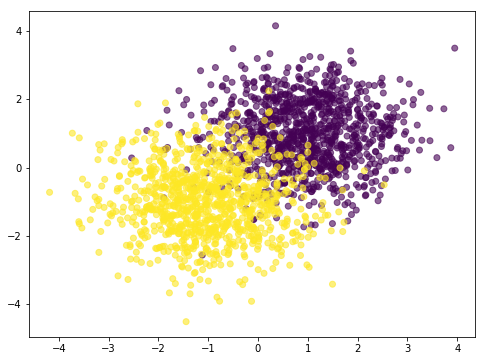

In [3]:
# Simulate Data

D = 2
K = 2
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([1,1])
X1 = np.random.randn((N//K),D) + np.array([-1,-1])
X = np.vstack((X0, X1))

y = np.array([0]*(N//K) + [1]*(N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.6)

In [4]:
# Data Prep

X = np.hstack((np.ones((N,1)), X))

X[:10,:]

array([[ 1.        ,  0.72017295,  0.01043246],
       [ 1.        ,  1.6212003 , -0.10859981],
       [ 1.        ,  0.87306189,  1.06198656],
       [ 1.        ,  1.61862692, -0.21612234],
       [ 1.        ,  0.79628688,  0.92379443],
       [ 1.        ,  0.2259343 ,  2.02005007],
       [ 1.        ,  0.95626758, -0.6339737 ],
       [ 1.        ,  1.17095641,  0.64805649],
       [ 1.        , -0.23504427,  0.94664856],
       [ 1.        ,  0.59880488,  1.77515011]])

In [5]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

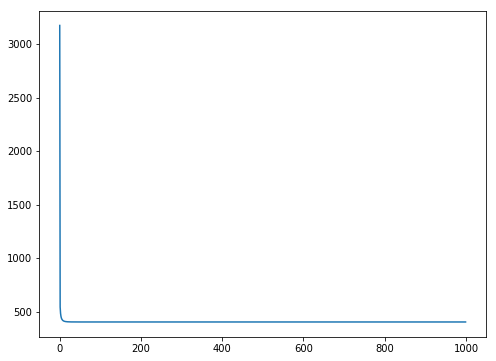

In [6]:
# Train the Model

w = np.random.randn(D+1)

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    p = sigmoid(X.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*X.T.dot(p - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [7]:
# Report Accuracy

print("Accuracy: {}".format(accuracy(y, p)))

Accuracy: 0.917


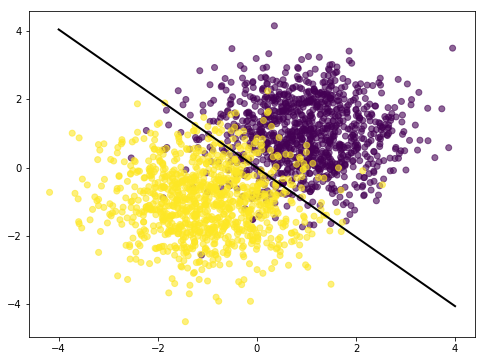

In [8]:
# Visualize the Decision Boundary (First way)

x1 = np.linspace(-4, 4, 10)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1

plt.figure(figsize = (8,6))
plt.scatter(X[:,1], X[:,2], c = y, alpha = 0.6)
plt.plot(x1, x2, color = "black", linewidth = 2)

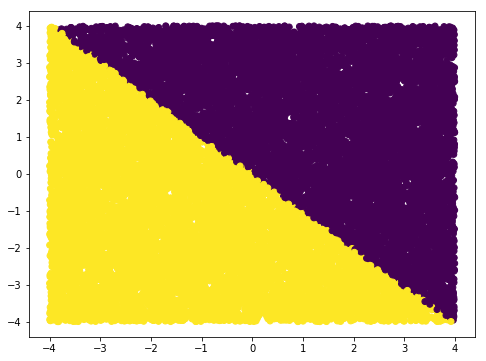

In [13]:
# Visualize the Decision Boundary (Second way)

X_vis = np.random.uniform(-4, 4, (int(10*N),D))
X_vis = np.hstack((np.ones((int(10*N),1)), X_vis))

X_vis[:10,:]

p_vis = sigmoid(X_vis.dot(w))

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,1], X_vis[:,2], c = np.round(p_vis))